## MSDS 7331 Data Mining: Regression & SVM

***  

Team: Andrew Abbott, Vivek Bejugama, Patrick McDevitt, Preeti Swaminathan



***
	
We are using an online news popularity dataset from the UCI Machine Learning Repository. The dataset is a collection of 61 heterogeneous features for approximately 40,000 articles published by Mashable (www.mashable.com). The features are not the articles, but are extracted from the articles, such as word counts, title word counts, and keyword associations.  The data represents a two year period of published articles, ending in January 2015.  

We intend to mine this data to understand what parameters can influence an article to be shared on social media more than others.  The goal is to predict the number of shares in social networks (popularity).  

The business use of this data set / data mining project is ultimately to establish relationships that enable to predict how many social media shares an article published on _www.mashable.com_ is likley to generate - with the idea that a more socially shared article has higher business value - increasing traffic to the site, and consequently, potential for higher earnings revenue associated to the increased web traffic. The user of this model is both the publishers for _mashable.com_ for article selection, and also for authors, attempting to create content that has higher value on sites like _mashable.com_.  

Measures for a successful outcome from a predictive model for this study will be based on overall accuracy metrics (e.g., confusion matrix), as well as AUC type metrics. A baseline (non-predictive, random) scoring will establish a baseline for these metrics, and then the predictive model can be assessed against a random model for measurement of improvement, i.e., value of the model.  

The data is located at https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity  

***  
__Citation Request__ :  
***  
K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal.  
***  


- The data set has features in these 6 broad categories :  
_(ref - see citation reference at beginning of this document)_  
    - Words  
        - Number of words of the title/content  
        - Average word length  
        - Rate of unique/non-stop words of contents
    - Links
        - Number of links  
        - Number of links to other articles in Mashable  
    - Digital Media  
        - Number of images/videos  
    - Time  
        - Day of the week/weekend  
    - Keywords  
        - Number of keywords  
        - Worst/best/average keywords (#shares)  
        - Article category  
    - NLP  
        - Closeness to five LDA topics  
        - Title/Text polarity/subjectivity  
        - Rate and polarity of positive/negative words  
        - Absolute subjectivity/polarity level  
     



### __Grading Rubric__  


#### __Create Models (50)__    

* Create a logistic regression model and a support vector machine model for the classification task involved with your dataset.  
* Assess how well each model performs (use 80/20 training/testing split for your data).  
* Adjust parameters of the models to make them more accurate.  
* If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines.  
* For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe.   


#### __Model Advantages (10)__  

* Discuss the advantages of each model for each classification task.  
* Does one type of model offer superior performance over another in terms of prediction accuracy?  
* In terms of training time or efficiency?  
* Explain in detail.  

#### __Interpret Feature Importance (30)__  

* Use the weights from logistic regression to interpret the importance of different features for the classification task.  
* Explain your interpretation in detail.  
* Why do you think some variables are more important?  


#### __Interpret Support Vectors (10)__  

* Look at the chosen support vectors for the classification task.  
* Do these provide any insight into the data? Explain.  
* If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model — then analyze the support vectors from the subsampled dataset.  



### Data Loading and cleanup

#### Import Required Packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore',DeprecationWarning)
import seaborn as sns
import time

#### Import Data from .csv file

In [22]:
data_dir = 'data/'
data_file = 'OnlineNewsPopularity.csv'

file_2_read = data_dir + data_file
df = pd.read_csv(file_2_read)  

#### Strip leading spaces from column names

In [23]:
df.columns = df.columns.str.strip()
col_names = df.columns.values.tolist()

An initial summary of the dataset attribute follows along with the simple statistics of the numeric attributes.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


On inspection some columns containing all zeros except for one data point are found and dropped from the analysis.

In [26]:
del df['n_non_stop_words']
del df['n_non_stop_unique_tokens']
del df['n_unique_tokens']

The next step is to convert the attributes to their appropriate data types.

In [27]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  convert the data type to Integer
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

to_int = ['timedelta','n_tokens_title', 'n_tokens_content',
    'num_hrefs','num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
    'data_channel_is_lifestyle',
    'data_channel_is_entertainment',
    'data_channel_is_bus',
    'data_channel_is_socmed',
    'data_channel_is_tech',
    'data_channel_is_world',
    'weekday_is_monday',
    'weekday_is_tuesday',
    'weekday_is_wednesday',
    'weekday_is_thursday',
    'weekday_is_friday',
    'weekday_is_saturday',
    'weekday_is_sunday',
    'is_weekend',
    'shares']

df[to_int] = df[to_int ].astype(np.int64)

Now a check for duplicates is done to ensure that the data set does not contain duplicated observations. No Duplicates are found.

In [28]:
df[df.duplicated()]

,url,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares


#### Create new features from existing data set  

- Based on inspection of the data set, we identified several opportunities to create some useful features from the original data set.

- The first data field, _url_, is the url address of the mashable published article, which contains in the link the year, month, day that the article was published and also the article title. We will use a string splitting function to parse the information in the url address to create the additional data columns : _year_, _month_, _day_, and _title_. Further, we can then combine the parsed year, month, day into a _published_date_ column. Although the original data set does contain the field _timedelta_ which provdes essentially a timeline of article publication dates, it does not contain the actual date of publication. We consider that having the actual date may prove useful to provide context or linkage with external data sources. We are not, at this time, linking in any additional external data sources, but that may be an opportunity with future work. In addition, we consider to storethe _title_ as a distinct data column, but we are not performing any analysis on that field at this time. We consider that the article title is an opportunity for text mining in the classification problem to be evaluated also with future work.  

- We check the skewness of the numeric attributes and transform those with extreme skew using a log transformation. The original, non-transformed attribute is then removed from the analysis.

- We also created a column to be used as binary popularity measure. Based on the business description of the goal, the goal is to build a model that provides predictive capability of article 'popular' or 'not popular', based on the metric of number of shares > 1400 (popular) or number of shares < 1400 (not popular). The value of 1400 was provided in the business statement, and is also the median value of the number of shares in the experience of this data set. To accomplish that purpose, we create a new column (binary) _popularity_ which is based on the number of shares reported in the _shares_ data column. This can be used in future work, e.g., in classificiation or binary logistic regression analyses to support the business goal.  

- The code to accomplish all of the above is shown here below.  

***  


In [29]:

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... Extract useable elements from the string URL
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df['http'], df['blank'], df['mash'], df['year'], df['month'], df['day'],df['title'],df['extra'] = df['url'].str.split('\/', 7).str

# ...  delete unneeded columns

del df['http'], df['blank'], df['mash'], df['extra']
del df['url']
del df['title']

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  Derive date column from year-month-day fields
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df['year']  = (df['year']).astype(str)
df['month'] = (df['month']).astype(str)
df['day']   = (df['day']).astype(str)
df['publish_date'] = pd.to_datetime(df.year + df.month + df.day, format = "%Y%m%d")

del df['month']
del df['day']

df['year'] = df['year'].astype(int)

del df['publish_date']

In [30]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  ln() transform right skewed distribution variables (skewness > 1)
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df_numeric = df.select_dtypes(['number'])

numeric_col_names = df_numeric.columns.values.tolist()

# ... store min value for each column

df_mins = df.min()

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  loop on each column, test for skewness, create new column if conditions met
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

columns_to_drop = []

for column in numeric_col_names:
    sk = df[column].skew()
    
    if(sk > 1):
        new_col_name = 'ln_' + column
        print (column, sk, new_col_name)
        
        if df_mins[column] > 0:
            df[new_col_name] = np.log(df[column])
            columns_to_drop.append(column)
            
        elif df_mins[column] == 0:
            df_tmp = df[column] + 1
            df[new_col_name] = np.log(df_tmp)
            columns_to_drop.append(column)
            
        else:
            print('--> Ln() transform not completed -- skew > 1, but min value < 0 :', column, '!!')
            
            
# ... delete tmp data

del df_tmp
del df_mins
del df_numeric

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  based on inspection, a few of these are just not valid ranges in ln() space
# ...  -- just delete these few back out of the data set
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

print (columns_to_drop)



del df['ln_LDA_00']
del df['ln_LDA_01']
del df['ln_LDA_02']
del df['ln_LDA_03']
del df['ln_LDA_04']
columns_to_drop.remove('LDA_00')
columns_to_drop.remove('LDA_01')
columns_to_drop.remove('LDA_02')
columns_to_drop.remove('LDA_03')
columns_to_drop.remove('LDA_04')


# ...  these are binary indicators ... so no need to ln-transform

del df['ln_data_channel_is_lifestyle']
del df['ln_data_channel_is_entertainment']
del df['ln_data_channel_is_bus']
del df['ln_data_channel_is_socmed']
del df['ln_data_channel_is_tech']
del df['ln_data_channel_is_world']
del df['ln_weekday_is_monday']
del df['ln_weekday_is_tuesday']
del df['ln_weekday_is_wednesday']
del df['ln_weekday_is_thursday']
del df['ln_weekday_is_friday']
del df['ln_weekday_is_saturday']
del df['ln_weekday_is_sunday']

del df['ln_is_weekend']
columns_to_drop.remove('is_weekend')

columns_to_drop.remove('data_channel_is_lifestyle')
columns_to_drop.remove('data_channel_is_entertainment')
columns_to_drop.remove('data_channel_is_bus')
columns_to_drop.remove('data_channel_is_socmed')
columns_to_drop.remove('data_channel_is_tech')
columns_to_drop.remove('data_channel_is_world')
columns_to_drop.remove('weekday_is_monday')
columns_to_drop.remove('weekday_is_tuesday')
columns_to_drop.remove('weekday_is_wednesday')
columns_to_drop.remove('weekday_is_thursday')
columns_to_drop.remove('weekday_is_friday')
columns_to_drop.remove('weekday_is_saturday')
columns_to_drop.remove('weekday_is_sunday')


# ... not needed for binary analysis ... will use popular indicator

del df['ln_shares'] 
columns_to_drop.remove('shares')

print ('\n-----------------------------------\n')
print ('Number of current columns in dataset :', len(df.columns))



df.drop(columns_to_drop, axis = 1, inplace = True)

df.info()


n_tokens_content 2.94542193879 ln_n_tokens_content
num_hrefs 4.0134948282 ln_num_hrefs
num_self_hrefs 5.17275110576 ln_num_self_hrefs
num_imgs 3.94659584465 ln_num_imgs
num_videos 7.0195327863 ln_num_videos
data_channel_is_lifestyle 3.99301914336 ln_data_channel_is_lifestyle
data_channel_is_entertainment 1.6835848094 ln_data_channel_is_entertainment
data_channel_is_bus 1.87687018599 ln_data_channel_is_bus
data_channel_is_socmed 3.75887963097 ln_data_channel_is_socmed
data_channel_is_tech 1.61997576469 ln_data_channel_is_tech
data_channel_is_world 1.40516938412 ln_data_channel_is_world
kw_min_min 2.37494728018 ln_kw_min_min
--> Ln() transform not completed -- skew > 1, but min value < 0 : kw_min_min !!
kw_max_min 35.3284337312 ln_kw_max_min
kw_avg_min 31.3061081027 ln_kw_avg_min
--> Ln() transform not completed -- skew > 1, but min value < 0 : kw_avg_min !!
kw_min_max 10.3863716348 ln_kw_min_max
kw_max_avg 16.4116695554 ln_kw_max_avg
kw_avg_avg 5.76017729162 ln_kw_avg_avg
self_reference

#### Data Selection - First evaluation  

- There are 60 columns in the original data set; we added a few additonal columns based on observed opportunities (e.g., _publication_date_, ...) as explained above. 
    
- From this data set, we did a simple correlation matrix to look for variables that are highly correlated with each other that could be removed with little loss of information.

- With that downselection, we proceeded with additional evaluation of these remaining variables.
    
- we recognize that there is likely significant additional opportunity for modeling improvements with many of the remaining variables, and will look to re-expand the data set to further consider that with future work.  

In [31]:

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... display highest correlation pairs from corr() matrix 
# ...
# ... https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df_numeric = df.select_dtypes(['number'])

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n = 5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels = labels_to_drop).sort_values(ascending = False)
    return au_corr[0:n]

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... list out Top30 correlations
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

n_val = 30

top_30_corr_list = get_top_abs_correlations(df_numeric, n_val)
print("\n\n-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")
print("Top Absolute Correlations\n")
print(top_30_corr_list)

icor = 0
drop_column = list()
while (top_30_corr_list[icor] > 0.65):
    drop_column.append(top_30_corr_list[top_30_corr_list == top_30_corr_list[icor]].index[0][0])
    icor += 1

drop_column = list(set(drop_column))

print("\n\n-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")
print("Columns Recommended for removal based on correlation > 0.65")
print("-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-\n")

print("\n".join(sorted(drop_column)))

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... drop one of the high correlation columns (2nd of the pair)
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df = df.drop(drop_column, axis = 1)

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... show correlation test with remaining, to confirm
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df_reduced_numeric = df.select_dtypes(['number'])

top_30_corr_list = get_top_abs_correlations(df_reduced_numeric, n_val)

print("\n\n-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")
print("\n\nTop Absolute Correlations (2nd Pass)\n")
print(top_30_corr_list)






-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Top Absolute Correlations

ln_self_reference_max_shares   ln_self_reference_avg_sharess      0.994639
ln_self_reference_min_shares   ln_self_reference_avg_sharess      0.971014
                               ln_self_reference_max_shares       0.945943
kw_min_avg                     ln_kw_min_max                      0.926784
ln_kw_max_avg                  ln_kw_avg_avg                      0.899409
timedelta                      year                               0.876403
kw_min_min                     kw_max_max                         0.857226
data_channel_is_world          LDA_02                             0.836618
rate_negative_words            ln_global_rate_negative_words      0.782517
data_channel_is_bus            LDA_00                             0.774651
average_token_length           ln_n_tokens_content                0.768795
data_channel_is_tech           LDA_04                             0.749737
avg_negative_

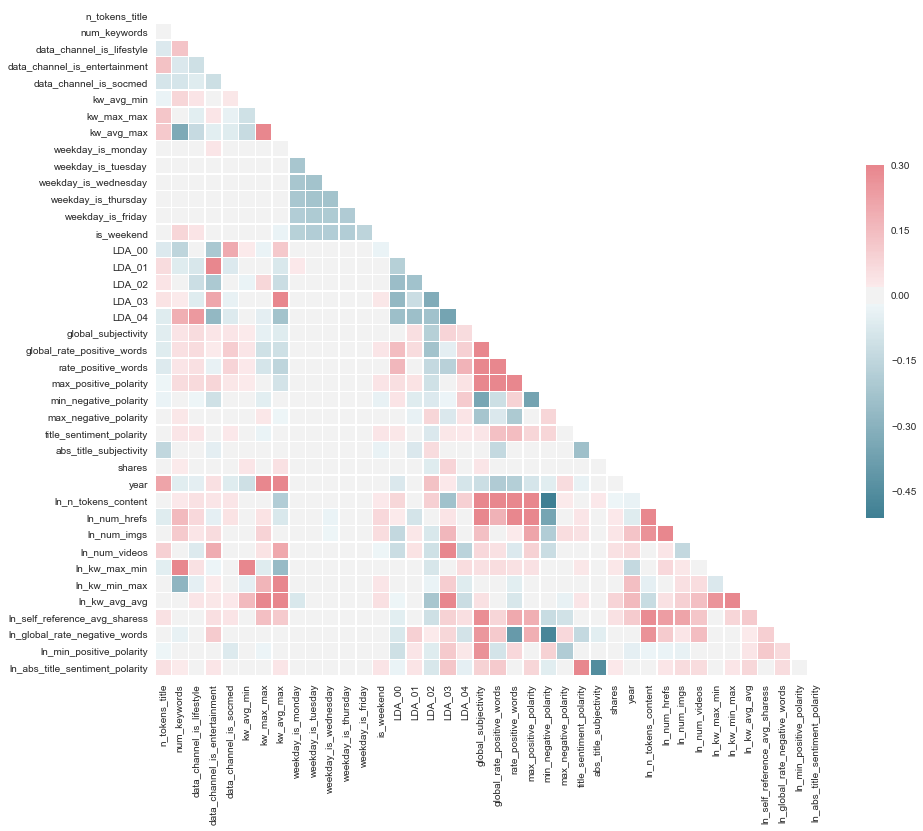

In [32]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# from example found at https://www.kaggle.com/maheshdadhich/strength-of-visualization-python-visuals-tutorial/notebook

Popularity Variable is created. An article is labelled as popular if it has greater than 1,400 shares.

In [33]:
popular_binary = np.where(df['shares'] > 1400, True, False)

df.insert(loc = 0, column = 'popular', value = popular_binary)

del df['shares'] 

In [34]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  branch a separate copy of data frame to support SVM development
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df_svm = df.copy()


data_dir = 'data/'
data_file = 'mashable_clean_dataset_for_LR_and_SVM.csv'

file_2_write = data_dir + data_file

df_svm.to_csv(file_2_write, index = False)

df_svm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 40 columns):
popular                            39644 non-null bool
n_tokens_title                     39644 non-null int64
num_keywords                       39644 non-null int64
data_channel_is_lifestyle          39644 non-null int64
data_channel_is_entertainment      39644 non-null int64
data_channel_is_socmed             39644 non-null int64
kw_avg_min                         39644 non-null float64
kw_max_max                         39644 non-null float64
kw_avg_max                         39644 non-null float64
weekday_is_monday                  39644 non-null int64
weekday_is_tuesday                 39644 non-null int64
weekday_is_wednesday               39644 non-null int64
weekday_is_thursday                39644 non-null int64
weekday_is_friday                  39644 non-null int64
is_weekend                         39644 non-null int64
LDA_00                             39644 non-n

# Model Creation

## Training and Testing Split


For training and testing purposes, we use 80% of the observations for training and 20% for testing. This process is repeated three times and uses the shuffle split cross validation method built into scikit-learn.

In [35]:
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt
from sklearn.svm import SVC

df_svm_top39 = df_svm.copy()

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  dataframe in which to record results of model metrics
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

results_table_labels = ['kernel', 'C', 'gamma', 'n_features', 'process_time', 'accuracy', 'recall', 'precision', 'f1_score']
df_results = pd.DataFrame(columns = results_table_labels)

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  separate X and y matrices 
# ...
# ...  convert to numpy matrices by calling 'values' on the pandas data frames
# ...  they are now simple matrices for compatibility with scikit-learn
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

if 'popular' in df_svm_top39:
    y = df_svm_top39['popular'].values         # set 'popular' as dependent
    del df_svm_top39['popular']                # remove from dataset
    X = df_svm_top39.values                    # use everything else for independent EVs

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  setup cross-validation in sklearn
# ...
# ...  split into training and test sets
# ....  --> 3 folds
# ...   --> 80% / 20% training / test
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

num_cv_iterations = 3

num_instances = len(y)

cv_object = ShuffleSplit(n_splits = num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)



***  

## __Support Vector Machine__  

*** 



First, to prepare the data for the SVM classifier, the data is split into training and test using the indices in the Cross Validation object.

In [36]:
for train_indices, test_indices in cv_object.split(X, y): 
    X_train = X[train_indices]
    y_train = y[train_indices]    
    X_test = X[test_indices]
    y_test = y[test_indices]

Next, because each attribute is on a different scale, they must be scaled in order to get an accurate idea of their influence on popularity.

In [37]:
scl_obj = StandardScaler()
scl_obj.fit(X_train)                        # scale for each column for (0,1) mean, std

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test)


Now the Support Vector Machine Classifier object is created.

For parameters we start with:
- C = 0.5
- penalty parameter; controls the trade-off between smooth decision boundary and classifying the training points correctly
- kernel = linear
- gamma = auto
- kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’;
- the higher the value of gamma, will try to exact fit
- for the rbf kernel the transformed space is infinite-dimensional

 https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/



In [38]:

print('\n----------------------------------------------------')
print('\tSVM - kernel = linear - C = 0.5 - gamma = auto ---')
print('----------------------------------------------------')
 
tic = time.clock()

# ...  get SVC object

krnl = 'linear'
C_param = 0.5
gamma_param = 'auto'

svm_clf = SVC(C = 0.5, kernel = 'linear', degree = 3, gamma = 'auto')



----------------------------------------------------
	SVM - kernel = linear - C = 0.5 - gamma = auto ---
----------------------------------------------------


The model is trained using the svm_clf classifer and the fit method.

In [40]:
svm_clf.fit(X_train_scaled, y_train)

The model is then tested by using the predict method on the scaled test data and reporting the accuracy, recall, precision, F1 score and confusion matrix for the model's prediction, y_hat, compared to y_test, the actual outcome.

In [41]:
# ... print out process time
toc = time.clock()
    
# ... test set predictions
y_hat = svm_clf.predict(X_test_scaled)

# ... model classification metrics
acc = mt.accuracy_score(y_test, y_hat)
rec = mt.recall_score(y_test, y_hat)
pre = mt.precision_score(y_test, y_hat)
f1s = mt.f1_score(y_test, y_hat)
conf = mt.confusion_matrix(y_test, y_hat)

print('\n----------------------------------------------------')
print('Accuracy  = %9.3f' % acc )
print('Recall    = %9.3f' % rec )
print('Precision = %9.3f' % pre )
print('F1 Score  = %9.3f' % f1s )
print('\n----------------------------------------------------')
print('Confusion matrix\n', conf)
print('----------------------------------------------------')


# ... add model metrics to results data frame
new_row = [krnl, C_param, gamma_param, len(df_svm_top39.columns), toc-tic, acc, rec, pre, f1s]
df_results.loc[len(df_results)] = new_row
print(df_results)


----------------------------------------------------
Accuracy  =     0.646
Recall    =     0.644
Precision =     0.645
F1 Score  =     0.645

----------------------------------------------------
Confusion matrix
 [[2577 1400]
 [1405 2547]]
----------------------------------------------------
   kernel    C gamma n_features  process_time  accuracy    recall  precision  \
0  linear  0.5  auto         39    313.187873  0.646235  0.644484     0.6453   

   f1_score  
0  0.644892  


In [42]:
# look at the support vectors

print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(25093, 39)
(25093,)
[12549 12544]


To evaluate the importance of each feature, the feature weights provided by the model are shown graphically below. Since it is their absolute values that are important, the second graph plots them in ascending order by their magnitudes.

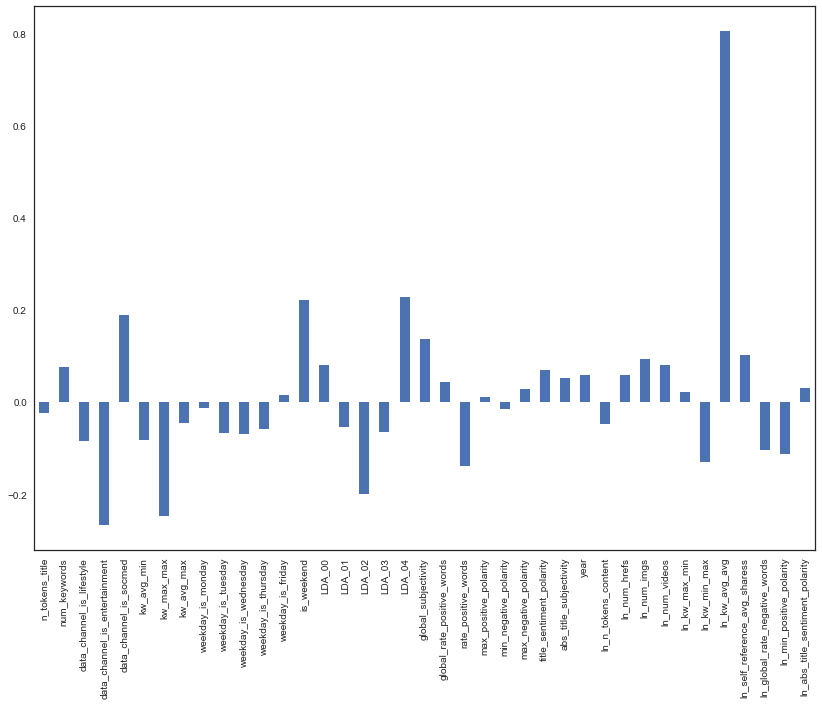

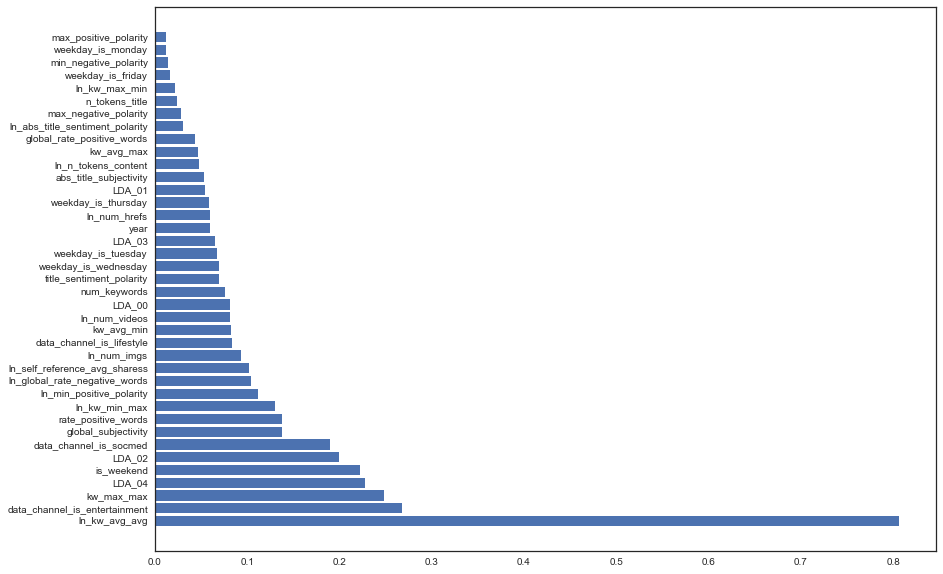

                           ln_kw_avg_avg :     0.806
           data_channel_is_entertainment :     0.268
                              kw_max_max :     0.248
                                  LDA_04 :     0.228
                              is_weekend :     0.222
                                  LDA_02 :     0.200
                  data_channel_is_socmed :     0.190
                     global_subjectivity :     0.138
                     rate_positive_words :     0.138
                           ln_kw_min_max :     0.130
                ln_min_positive_polarity :     0.112
           ln_global_rate_negative_words :     0.104
           ln_self_reference_avg_sharess :     0.102
                             ln_num_imgs :     0.093
               data_channel_is_lifestyle :     0.084
                              kw_avg_min :     0.083
                           ln_num_videos :     0.082
                                  LDA_00 :     0.082
                            num_keywords :    

In [43]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  support function to create sorted absolute value of SV weights
# ... 
# ...  https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

def f_importances(coef, names):
    imp = coef
    imp_abs = abs(coef)
    imp, names = zip(*sorted(zip(imp_abs,names), reverse = True))
    plt.figure(figsize = (14,10))
    plt.barh(range(len(names)), imp, align = 'center')
    plt.yticks(range(len(names)), names)
    plt.show()
    for nm, val in zip(names, imp):
        print ("%40s : %9.3f" % (nm, val))

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  if kernel = linear -- can plot out the weights to evaluate relative influences
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

krnl = 'linear'

if krnl == 'linear':
#    print(svm_clf.coef_)
#    print(df_svm.columns)

# ... - vertical bar chart with sign retained to see +/- effects

    weights = pd.Series(svm_clf.coef_[0], index = df_svm_top39.columns)
    plt.figure(figsize=(14,10))
    weights.plot(kind = 'bar')

# ... - horizontal bar chart of abs value in ranked order

    f_importances(svm_clf.coef_[0], df_svm_top39.columns)
    

Let us review those instances chosen as support vectors. Let's look at the support for the vectors and see if they are indicative of anything. 

First, grab the rows that were selected as support vectors (these are usually instances that are hard to classify).

In [47]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  review suport vectors for
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


df_tested_on = df_svm_top39.iloc[train_indices].copy() # saved from above, the indices chosen for training

# now get the support vectors from the trained model

df_support = df_tested_on.iloc[svm_clf.support_,:].copy()

df_support['popular'] = y[svm_clf.support_] # add back in the 'popular' Column to the pandas dataframe
df_svm_top39['popular'] = y # also add it back in for the original data

Now lets see the statistics of these attributes

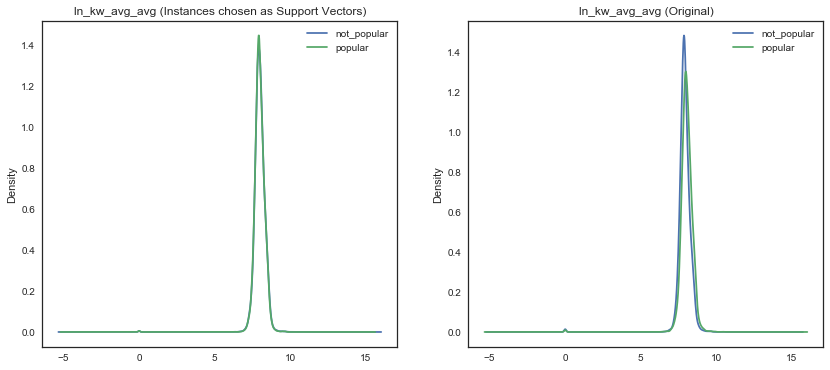

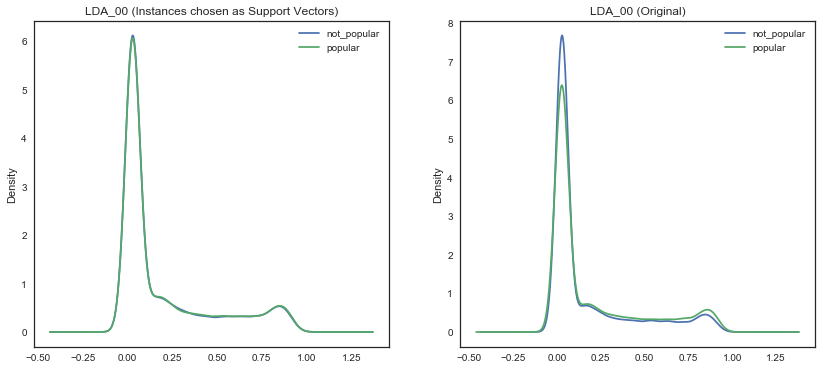

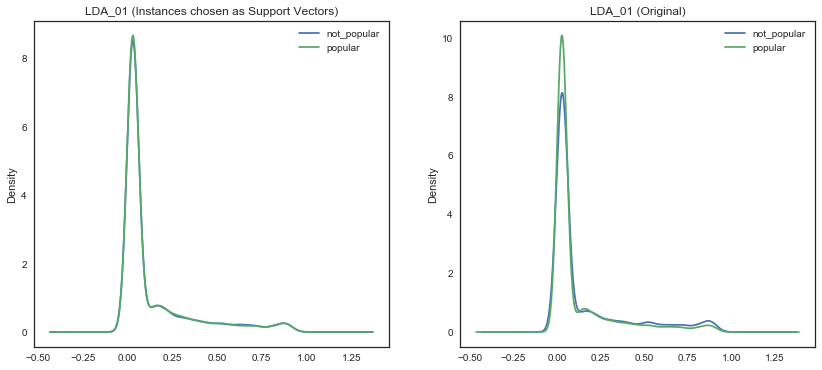

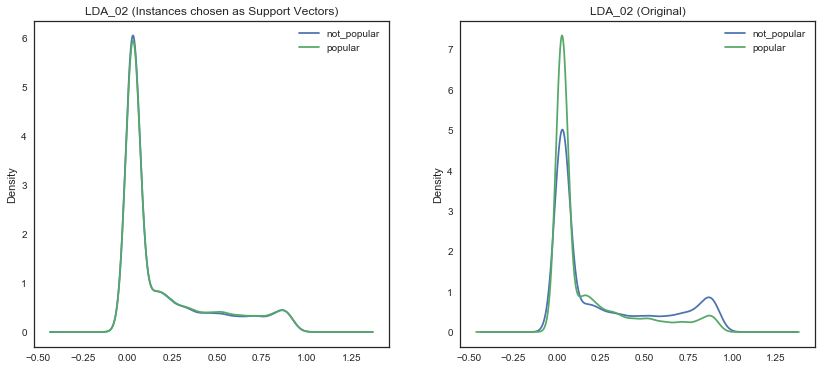

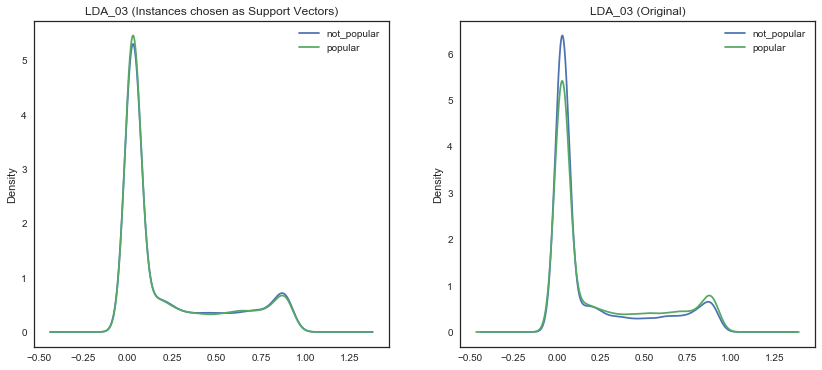

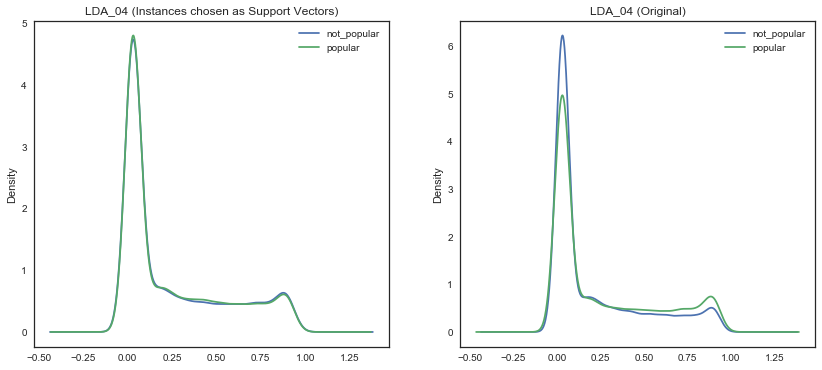

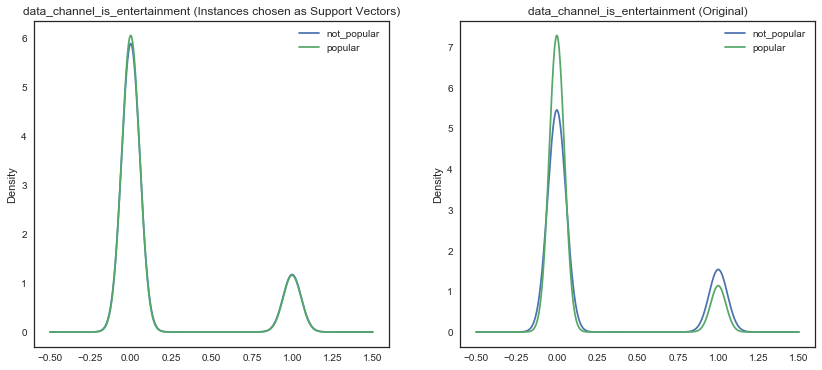

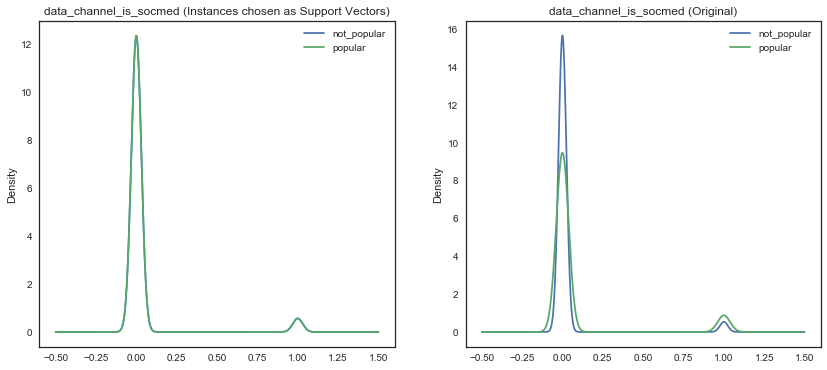

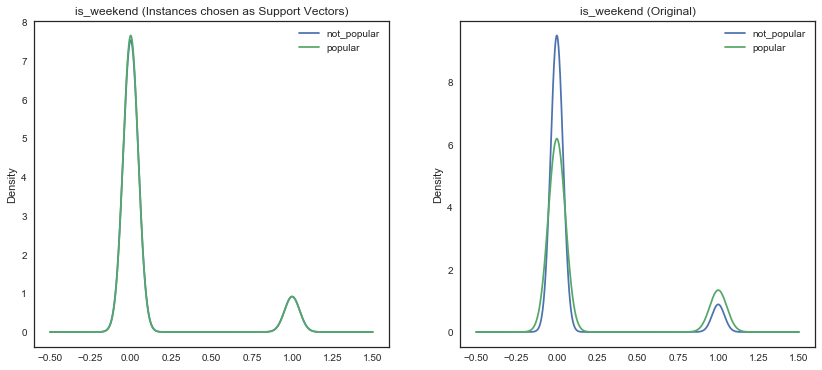

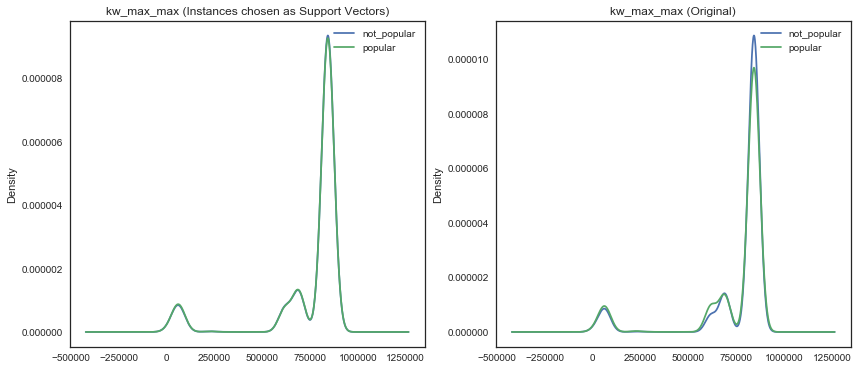

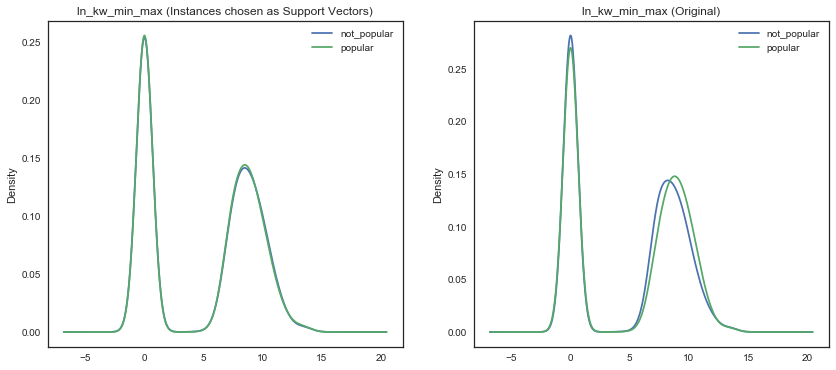

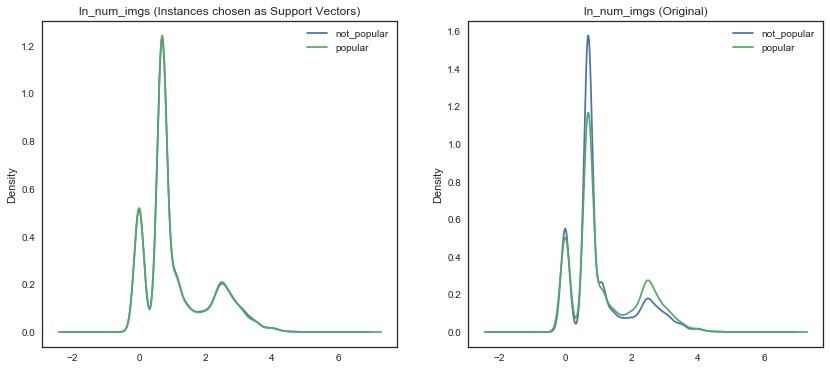

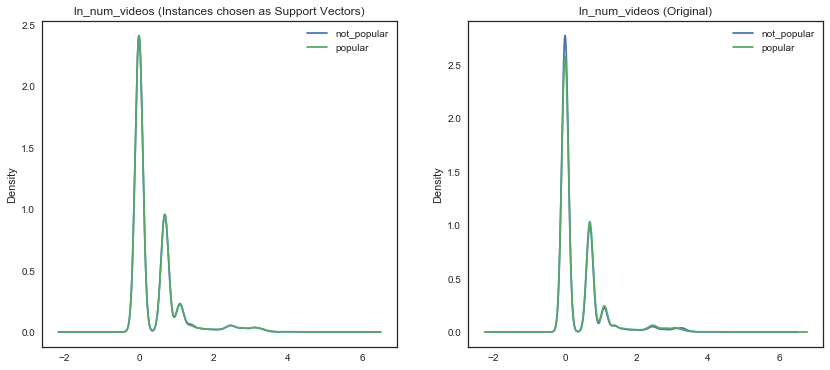

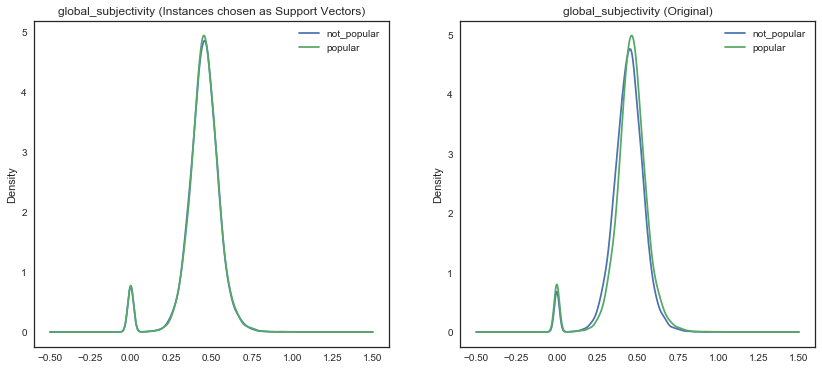

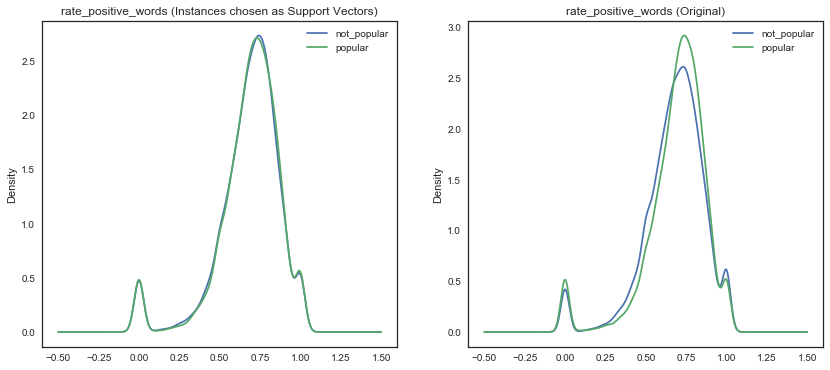

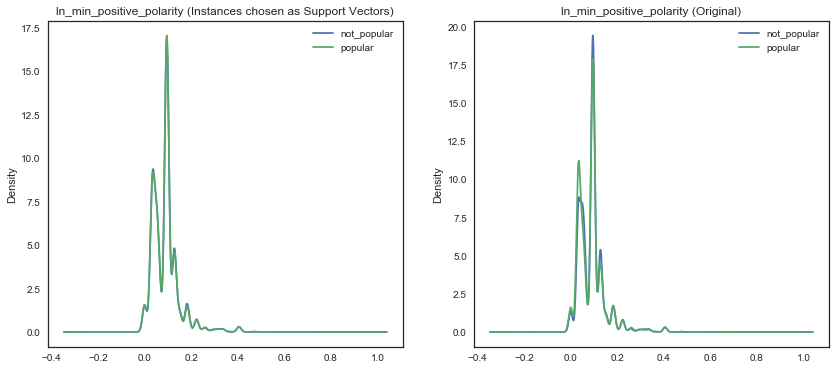

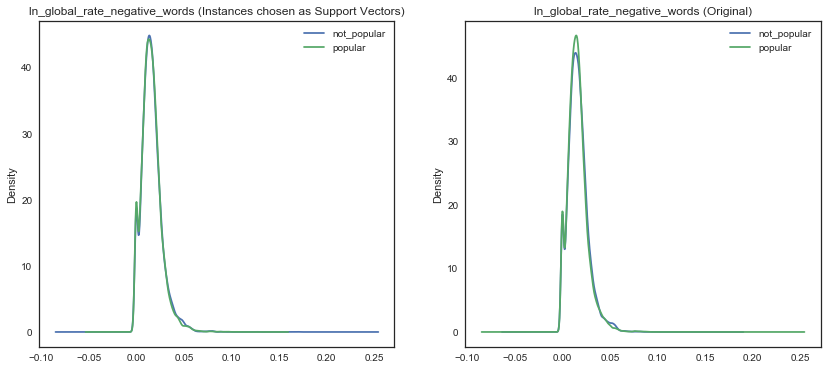

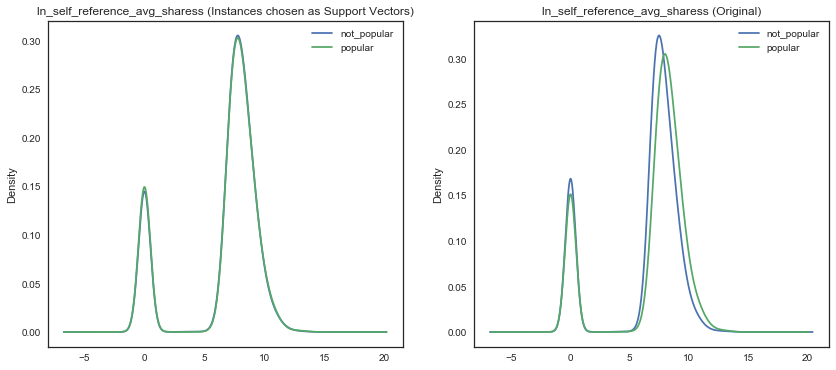

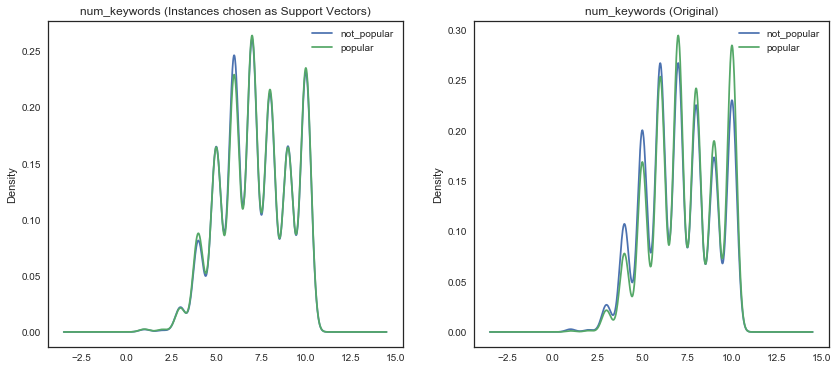

In [48]:
from pandas.tools.plotting import boxplot

# group the original data and the support vectors

df_grouped_support = df_support.groupby(['popular'])
df_grouped = df_svm_top39.groupby(['popular'])

# plot KDE of Different variables

vars_to_plot = ['ln_kw_avg_avg', 
    'LDA_00',
    'LDA_01',
    'LDA_02',
    'LDA_03',
    'LDA_04',
    'data_channel_is_entertainment',
    'data_channel_is_socmed',
    'is_weekend',
    'kw_max_max',
    'ln_kw_min_max',
    'ln_num_imgs',
    'ln_num_videos',
    'global_subjectivity',
    'rate_positive_words',
    'ln_min_positive_polarity',
    'ln_global_rate_negative_words',
    'ln_self_reference_avg_sharess',
    'num_keywords'
]

for v in vars_to_plot:
    plt.figure(figsize=(14, 6))
    
    # plot support vector stats
    
    plt.subplot(1, 2, 1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['not_popular','popular'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['not_popular','popular'])
    plt.title(v+' (Original)')



So the analysis here is basically telling us what the original statistics of the data looked like, and also what the statistics of the support vectors looked like. We can see that the separation in distributions is not as great as the separation for the original data. This is because the support vectors tend to be instances on the edge of the class boundaries and also instances that are classified incorrectly in the training data.

That's mostly it for using these things! They are really nice analysis tools and provide human interpretable summaries of the data.   

### Support Vector Machine - Version 2

We decided toalso test a Support Vector Machine model using just the top 20 weighted variables from the linear model. We will test these using the linear kernal as well as a non-linear kernal to see if accuracy is improved.

In [49]:

# ... select top20 weighted parameters from linear model
# ... use in non-linear kernal analyses for ?improved? accuracy
# ... first : repeat linear analysis to see if accuracy affected by down-select

cols_2_keep = ['popular',
 'ln_kw_avg_avg', 
    'LDA_00',
    'LDA_01',
    'LDA_02',
    'LDA_03',
    'LDA_04',
    'data_channel_is_entertainment',
    'data_channel_is_socmed',
    'is_weekend',
    'kw_max_max',
    'ln_kw_min_max',
    'ln_num_imgs',
    'ln_num_videos',
    'global_subjectivity',
    'rate_positive_words',
    'ln_min_positive_polarity',
    'ln_global_rate_negative_words',
    'ln_self_reference_avg_sharess',
    'num_keywords']

df_svm_top20 = df_svm[cols_2_keep].copy()


Again we separate X and y matrices,then convert to numpy matrices by calling 'values' on the pandas data frames they are now simple matrices for compatibility with scikit-learn.

In [56]:
if 'popular' in df_svm_top20:
    y = df_svm_top20['popular'].values         # set 'popular' as dependent
    del df_svm_top20['popular']                # remove from dataset
    X = df_svm_top20.values                    # use everything else for independent EVs

The cross validation object is created as earlier.

In [57]:
num_cv_iterations = 3

num_instances = len(y)

cv_object = ShuffleSplit(n_splits = num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


The train and test sets are created and scaled as before:

In [60]:

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  run through the cross validation loop and set the training and testing
# ...  variable for one single iteration
# ...
# ...  --> this method is memory-user, but easier to follow what is being done 
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

for train_indices, test_indices in cv_object.split(X, y): 
    X_train = X[train_indices]
    y_train = y[train_indices]    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... scale attributes by the training set
# ... - normalize features based on mean & stdev of each column
# ... - do not use the testing data
# ... - use what was last stored in the variables: X_train, y_train, X_test, y_test
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

scl_obj = StandardScaler()
scl_obj.fit(X_train)                        # scale for each column for (0,1) mean, std
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 


This time we will test different combinations of parameters. The results are displayed in a table following the code.

In [61]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... use SVM, train the model
# ...
# ... - C = 0.5
# ...   - penalty parameter; controls the trade-off between smooth decision boundary
# ...   - and classifying the training points correctly
# ...
# ... - kernel = linear
# ...
# ... - gamma = auto
# ...   - kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’;
# ...   - the higher the value of gamma, will try to exact fit
# ...   - for the rbf kernel the transformed space is infinite-dimensional
# ...
# ...  https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

#C_param = 0.5

for ikrnl in ['linear', 'rbf', 'poly', 'sigmoid']:
    for C_param in [0.5, 1, 2, 4]:
        #C_param = C_param * 2
        tic = time.clock()
        # ...  get SVC object
        krnl = ikrnl
        gamma_param = 'auto'
        svm_clf = SVC(C = C_param, kernel = krnl, degree = 3, gamma = gamma_param)
        # ... train
        svm_clf.fit(X_train_scaled, y_train)
        # ... print out process time
        toc = time.clock()
        print('\n----------------------------------------------------')
        print('Process time : ', toc - tic, 'seconds')
        print('----------------------------------------------------')
        # ... test set predictions
        y_hat = svm_clf.predict(X_test_scaled)
        # ... model classification metrics
        acc = mt.accuracy_score(y_test, y_hat)
        rec = mt.recall_score(y_test, y_hat)
        pre = mt.precision_score(y_test, y_hat)
        f1s = mt.f1_score(y_test, y_hat)
        conf = mt.confusion_matrix(y_test, y_hat)
        print('\n----------------------------------------------------')
        print('Model Accuracy = ', acc )
        print('Model Recall = ', rec )
        print('Model Precision = ', pre )
        print('Model F1 Score = ', f1s )
        print('\n----------------------------------------------------')
        print('Confusion matrix\n', conf)
        print('----------------------------------------------------')
        # ... add model metrics to results data frame
        new_row = [krnl, C_param, gamma_param, len(df_svm_top20.columns), toc-tic, acc, rec, pre, f1s]
        df_results.loc[len(df_results)] = new_row

print(df_results)



----------------------------------------------------
Process time :  42.625917000000015 seconds
----------------------------------------------------

----------------------------------------------------
Model Accuracy =  0.641190566276
Model Recall =  0.658412050038
Model Precision =  0.631179637788
Model F1 Score =  0.644508309384

----------------------------------------------------
Confusion matrix
 [[2505 1507]
 [1338 2579]]
----------------------------------------------------

----------------------------------------------------
Process time :  57.89961900000003 seconds
----------------------------------------------------

----------------------------------------------------
Model Accuracy =  0.641316685585
Model Recall =  0.658412050038
Model Precision =  0.631334149327
Model F1 Score =  0.644588852787

----------------------------------------------------
Confusion matrix
 [[2506 1506]
 [1338 2579]]
----------------------------------------------------

--------------------------

#### The accuracy does not change much with 20 down selected features as above compared with 39 features  
This can be seen by comparing lines 0 and 4 in the table above. Of the kernals, RBF appears to be outperforming the others just a bit. The C parameter has the most impact on the time taken to run the model so we will choose 0.5 to reduce cost. 

Will will use these parameters and re-run the analysis with 20 features and non-linear kernel  
kernel = __rbf__  

In [63]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... use SVM, train the model
# ...
# ... - C = 0.5
# ...   - penalty parameter; controls the trade-off between smooth decision boundary
# ...   - and classifying the training points correctly
# ...
# ... - kernel = rbf
# ...
# ... - gamma = auto
# ...   - kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’;
# ...   - the higher the value of gamma, will try to exact fit
# ...   - for the rbf kernel the transformed space is infinite-dimensional
# ...
# ...  https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

tic = time.clock()

# ...  get SVC object

krnl = 'rbf'
C_param = 0.5
gamma_param = 'auto'

svm_clf = SVC(C = 0.5, kernel = 'rbf', degree = 3, gamma = 'auto')

# ... train

svm_clf.fit(X_train_scaled, y_train)

# ... print out process time

toc = time.clock()
print('\n----------------------------------------------------')
print('Process time : ', toc - tic, 'seconds')
print('----------------------------------------------------')

# ... test set predictions

y_hat = svm_clf.predict(X_test_scaled)

# ... model classification metrics

acc = mt.accuracy_score(y_test, y_hat)
rec = mt.recall_score(y_test, y_hat)
pre = mt.precision_score(y_test, y_hat)
f1s = mt.f1_score(y_test, y_hat)

conf = mt.confusion_matrix(y_test, y_hat)

print('\n----------------------------------------------------')
print('Model Accuracy = ', acc )
print('Model Recall = ', rec )
print('Model Precision = ', pre )
print('Model F1 Score = ', f1s )

print('\n----------------------------------------------------')
print('Confusion matrix\n', conf)
print('----------------------------------------------------')


# ... add model metrics to results data frame, we don't need to redisplay it just yet.

new_row = [krnl, C_param, gamma_param, len(df_svm_top20.columns), toc-tic, acc, rec, pre, f1s]
df_results.loc[len(df_results)] = new_row


----------------------------------------------------
Process time :  41.072873999999956 seconds
----------------------------------------------------

----------------------------------------------------
Model Accuracy =  0.652162946147
Model Recall =  0.660199131989
Model Precision =  0.644405681535
Model F1 Score =  0.652206809584

----------------------------------------------------
Confusion matrix
 [[2585 1427]
 [1331 2586]]
----------------------------------------------------


We will try the same model with fewer variables to obseve how the accuracy changes.

In [65]:
# ... select Top10 ... and repeat

cols_2_keep = ['popular',
    'ln_kw_avg_avg',
    'kw_max_max',
    'LDA_00',
    'LDA_01',
    'LDA_02',
    'LDA_03',
    'LDA_04',
    'data_channel_is_entertainment',
    'data_channel_is_socmed',
    'is_weekend']

df_svm_top10 = df_svm[cols_2_keep].copy()


if 'popular' in df_svm_top10:
    y = df_svm_top10['popular'].values         # set 'popular' as dependent
    del df_svm_top10['popular']                # remove from dataset
    X = df_svm_top10.values                    # use everything else for independent EVs

num_cv_iterations = 3

num_instances = len(y)

cv_object = ShuffleSplit(n_splits = num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

for train_indices, test_indices in cv_object.split(X, y): 
    X_train = X[train_indices]
    y_train = y[train_indices]    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    scl_obj = StandardScaler()
    scl_obj.fit(X_train)                        # scale for each column for (0,1) mean, std
    
    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test) 


tic = time.clock()

# ...  get SVC object

krnl = 'linear'
C_param = 0.5
gamma_param = 'auto'

svm_clf = SVC(C = 0.5, kernel = 'linear', degree = 3, gamma = 'auto')

# ... train

svm_clf.fit(X_train_scaled, y_train)

# ... print out process time

toc = time.clock()
print('\n----------------------------------------------------')
print('Process time : ', toc - tic, 'seconds')
print('----------------------------------------------------')

# ... test set predictions

y_hat = svm_clf.predict(X_test_scaled)

# ... model classification metrics

acc = mt.accuracy_score(y_test, y_hat)
rec = mt.recall_score(y_test, y_hat)
pre = mt.precision_score(y_test, y_hat)
f1s = mt.f1_score(y_test, y_hat)

conf = mt.confusion_matrix(y_test, y_hat)

print('\n----------------------------------------------------')
print('Model Accuracy = ', acc )
print('Model Recall = ', rec )
print('Model Precision = ', pre )
print('Model F1 Score = ', f1s )

print('\n----------------------------------------------------')
print('Confusion matrix\n', conf)
print('----------------------------------------------------')


# ... add model metrics to results data frame

new_row = [krnl, C_param, gamma_param, len(df_svm_top10.columns), toc-tic, acc, rec, pre, f1s]
df_results.loc[len(df_results)] = new_row


ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)

----------------------------------------------------
Process time :  23.078452000000198 seconds
----------------------------------------------------

----------------------------------------------------
Model Accuracy =  0.630596544331
Model Recall =  0.683145491803
Model Precision =  0.611837577426
Model F1 Score =  0.645528258502

----------------------------------------------------
Confusion matrix
 [[2333 1692]
 [1237 2667]]
----------------------------------------------------


In [66]:
# ... select Top6 ... and repeat

cols_2_keep = ['popular',
            'ln_kw_avg_avg',
            'LDA_02',
            'LDA_03',
            'LDA_01',
            'LDA_00',
            'data_channel_is_entertainment']

df_svm_top6 = df_svm[cols_2_keep].copy()

if 'popular' in df_svm_top6:
    y = df_svm_top6['popular'].values         # set 'popular' as dependent
    del df_svm_top6['popular']                # remove from dataset
    X = df_svm_top6.values                    # use everything else for independent EVs


num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits = num_cv_iterations,
                         test_size  = 0.2)               
print(cv_object)

for train_indices, test_indices in cv_object.split(X, y): 
    X_train = X[train_indices]
    y_train = y[train_indices]    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    scl_obj = StandardScaler()
    scl_obj.fit(X_train)                        # scale for each column for (0,1) mean, std
    
    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test) 

tic = time.clock()

# ...  get SVC object

krnl = 'linear'
C_param = 0.5
gamma_param = 'auto'

svm_clf = SVC(C = 0.5, kernel = 'linear', degree = 3, gamma = 'auto')

# ... train

svm_clf.fit(X_train_scaled, y_train)

# ... print out process time

toc = time.clock()
print('\n----------------------------------------------------')
print('Process time : ', toc - tic, 'seconds')
print('----------------------------------------------------')

# ... test set predictions

y_hat = svm_clf.predict(X_test_scaled)

# ... model classification metrics

acc = mt.accuracy_score(y_test, y_hat)
rec = mt.recall_score(y_test, y_hat)
pre = mt.precision_score(y_test, y_hat)
f1s = mt.f1_score(y_test, y_hat)

conf = mt.confusion_matrix(y_test, y_hat)

print('\n----------------------------------------------------')
print('Model Accuracy = ', acc )
print('Model Recall = ', rec )
print('Model Precision = ', pre )
print('Model F1 Score = ', f1s )

print('\n----------------------------------------------------')
print('Confusion matrix\n', conf)
print('----------------------------------------------------')


# ... add model metrics to results data frame

new_row = [krnl, C_param, gamma_param, len(df_svm_top6.columns), toc-tic, acc, rec, pre, f1s]
df_results.loc[len(df_results)] = new_row


ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)

----------------------------------------------------
Process time :  18.760746000000154 seconds
----------------------------------------------------

----------------------------------------------------
Model Accuracy =  0.601715222601
Model Recall =  0.711335012594
Model Precision =  0.583953680728
Model F1 Score =  0.641380876675

----------------------------------------------------
Confusion matrix
 [[1947 2012]
 [1146 2824]]
----------------------------------------------------


#### Let's visualize the weights of the most influential six attributes.

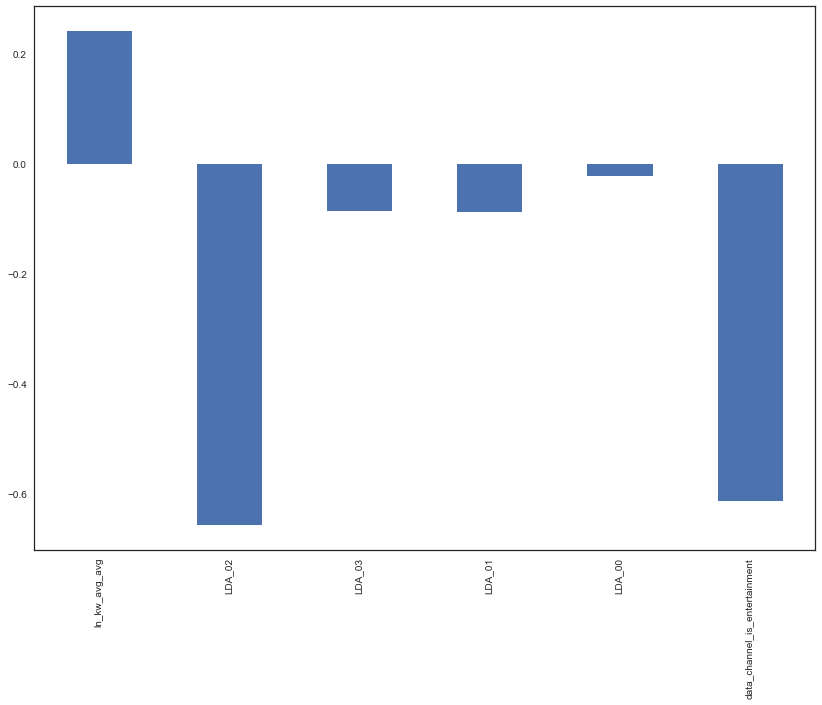

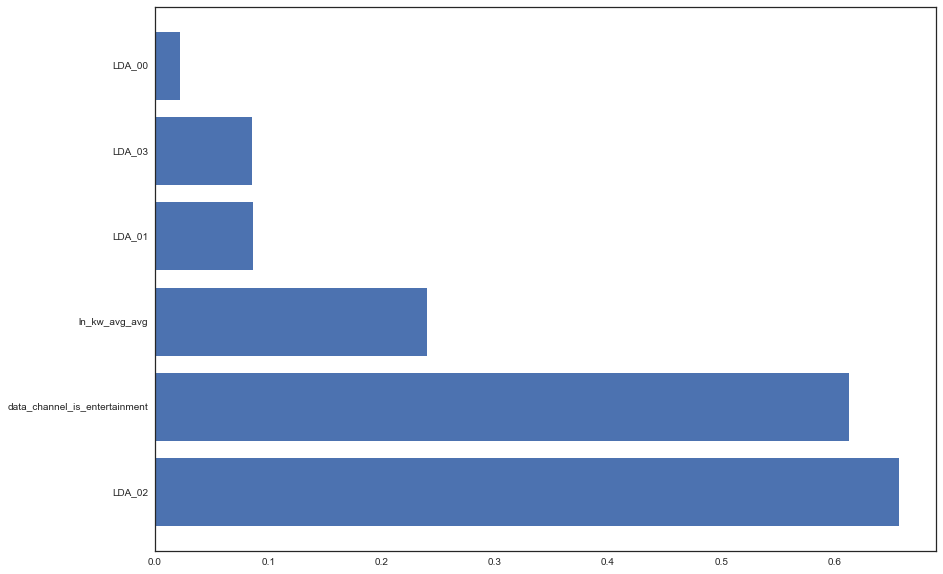

                                  LDA_02 :     0.657
           data_channel_is_entertainment :     0.613
                           ln_kw_avg_avg :     0.241
                                  LDA_01 :     0.087
                                  LDA_03 :     0.086
                                  LDA_00 :     0.023


In [96]:
def f_importances(coef, names):
    imp = coef
    imp_abs = abs(coef)
    imp, names = zip(*sorted(zip(imp_abs,names), reverse = True))
    plt.figure(figsize = (14,10))
    plt.barh(range(len(names)), imp, align = 'center')
    plt.yticks(range(len(names)), names)
    plt.show()
    for nm, val in zip(names, imp):
        print ("%40s : %9.3f" % (nm, val))

        
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  if kernel = linear -- can plot out the weights to evaluate relative influences
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

krnl = 'linear'

if krnl == 'linear':
#    print(svm_clf.coef_)
#    print(df_svm.columns)

# ... - vertical bar chart with sign retained to see +/- effects

    weights = pd.Series(svm_clf.coef_[0], index = df_svm_top6.columns)
    plt.figure(figsize=(14,10))
    weights.plot(kind = 'bar')

# ... - horizontal bar chart of abs value in ranked order

    f_importances(svm_clf.coef_[0], df_svm_top6.columns)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)

----------------------------------------------------
Process time :  12.606686999999965 seconds
----------------------------------------------------

----------------------------------------------------
Model Accuracy =  0.603607012234
Model Recall =  0.722827463897
Model Precision =  0.582007343941
Model F1 Score =  0.644818623573

----------------------------------------------------
Confusion matrix
 [[1933 2049]
 [1094 2853]]
----------------------------------------------------

----------------------------------------------------
Process time :  13.1721849999999 seconds
----------------------------------------------------

----------------------------------------------------
Model Accuracy =  0.592508513053
Model Recall =  0.713277903754
Model Precision =  0.574939073924
Model F1 Score =  0.636680535252

----------------------------------------------------
Confusion matrix
 [[1867 2093]
 [1138 2831]]
-----

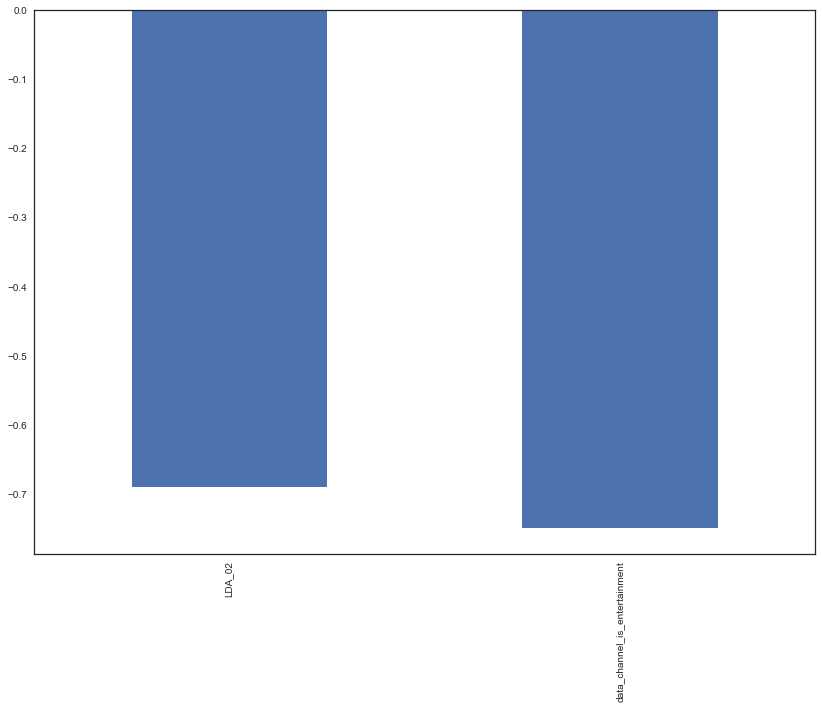

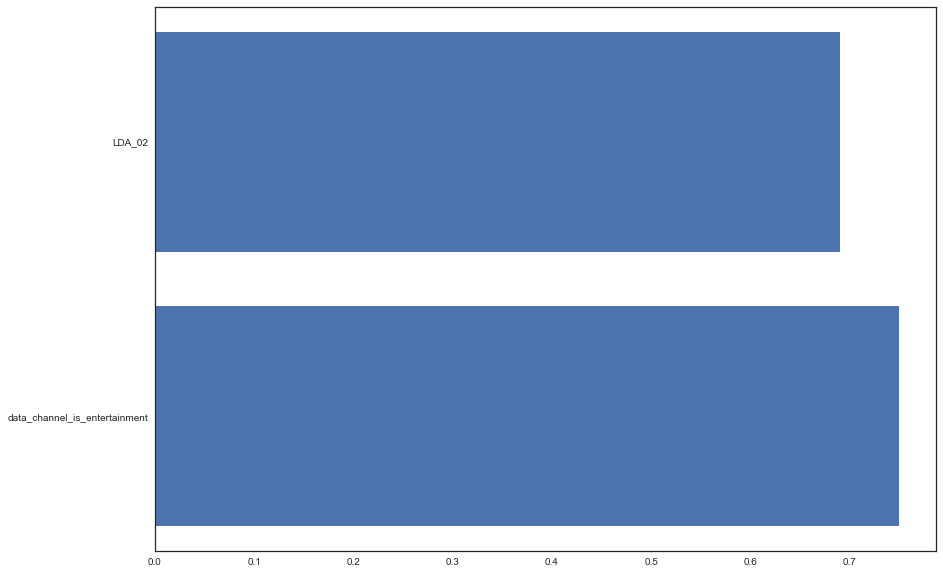

           data_channel_is_entertainment :     0.749
                                  LDA_02 :     0.690


In [67]:
# ... select Top2 ... and repeat

cols_2_keep = ['popular',
            'LDA_02',
            'data_channel_is_entertainment']

df_svm_top2 = df_svm[cols_2_keep].copy()

if 'popular' in df_svm_top2:
    y = df_svm_top2['popular'].values         # set 'popular' as dependent
    del df_svm_top2['popular']                # remove from dataset
    X = df_svm_top2.values                    # use everything else for independent EVs

num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits = num_cv_iterations,
                         test_size  = 0.2)               
print(cv_object)


for train_indices, test_indices in cv_object.split(X, y): 
    X_train = X[train_indices]
    y_train = y[train_indices]    
    X_test = X[test_indices]
    y_test = y[test_indices]
    

    scl_obj = StandardScaler()
    scl_obj.fit(X_train)                        # scale for each column for (0,1) mean, std
    
    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test) 

    tic = time.clock()

# ...  get SVC object

    krnl = 'linear'
    C_param = 0.5
    gamma_param = 'auto'
    
    svm_clf = SVC(C = 0.5, kernel = 'linear', degree = 3, gamma = 'auto')

# ... train

    svm_clf.fit(X_train_scaled, y_train)

# ... print out process time

    toc = time.clock()
    print('\n----------------------------------------------------')
    print('Process time : ', toc - tic, 'seconds')
    print('----------------------------------------------------')

# ... test set predictions

    y_hat = svm_clf.predict(X_test_scaled)

# ... model classification metrics

    acc = mt.accuracy_score(y_test, y_hat)
    rec = mt.recall_score(y_test, y_hat)
    pre = mt.precision_score(y_test, y_hat)
    f1s = mt.f1_score(y_test, y_hat)

    conf = mt.confusion_matrix(y_test, y_hat)

    print('\n----------------------------------------------------')
    print('Model Accuracy = ', acc )
    print('Model Recall = ', rec )
    print('Model Precision = ', pre )
    print('Model F1 Score = ', f1s )

    print('\n----------------------------------------------------')
    print('Confusion matrix\n', conf)
    print('----------------------------------------------------')

# ... add model metrics to results data frame

    new_row = [krnl, C_param, gamma_param, len(df_svm_top2.columns), toc-tic, acc, rec, pre, f1s]
    df_results.loc[len(df_results)] = new_row


  
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  if kernel = linear -- can plot out the weights to evaluate relative influences
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

krnl = 'linear'

if krnl == 'linear':
#    print(svm_clf.coef_)
#    print(df_svm.columns)

# ... - vertical bar chart with sign retained to see +/- effects

    weights = pd.Series(svm_clf.coef_[0], index = df_svm_top2.columns)
    plt.figure(figsize=(14,10))
    weights.plot(kind = 'bar')

# ... - horizontal bar chart of abs value in ranked order

    f_importances(svm_clf.coef_[0], df_svm_top2.columns)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


/Users/andrewabbott/.virtualenvs/dl4cv/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)



----------------------------------------------------
Process time :  7.425559000000021 seconds
----------------------------------------------------

----------------------------------------------------
Model Accuracy =  0.536889897843
Model Recall =  0.866683660464
Model Precision =  0.519163231028
Model F1 Score =  0.649350649351

----------------------------------------------------
Confusion matrix
 [[ 857 3149]
 [ 523 3400]]
----------------------------------------------------

----------------------------------------------------
Process time :  7.082599000000073 seconds
----------------------------------------------------

----------------------------------------------------
Model Accuracy =  0.54281750536
Model Recall =  0.866632860041
Model Precision =  0.524474451435
Model F1 Score =  0.653474811204

----------------------------------------------------
Confusion matrix
 [[ 886 3099]
 [ 526 3418]]
----------------------------------------------------

----------------------------

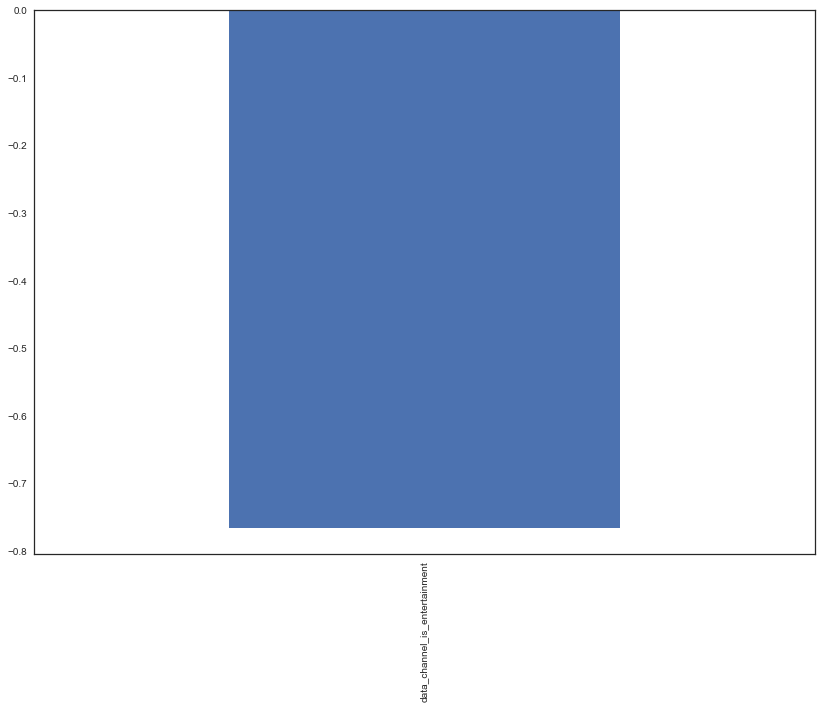

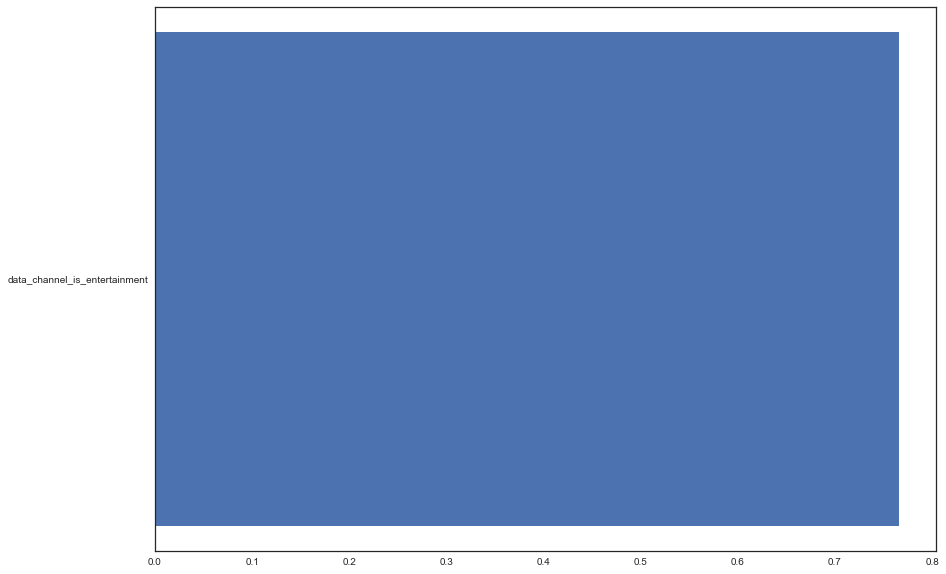

           data_channel_is_entertainment :     0.766


In [68]:
# ... select Top1 ... and repeat

cols_2_keep = ['popular',
            'data_channel_is_entertainment']

df_svm_top1 = df_svm[cols_2_keep].copy()


if 'popular' in df_svm_top1:
    y = df_svm_top1['popular'].values         # set 'popular' as dependent
    del df_svm_top1['popular']                # remove from dataset
    X = df_svm_top1.values                    # use everything else for independent EVs

num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits = num_cv_iterations,
                         test_size  = 0.2)               
print(cv_object)

for train_indices, test_indices in cv_object.split(X, y): 
    X_train = X[train_indices]
    y_train = y[train_indices]    
    X_test = X[test_indices]
    y_test = y[test_indices]
    

    scl_obj = StandardScaler()
    scl_obj.fit(X_train)                        # scale for each column for (0,1) mean, std
    
    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test) 

    tic = time.clock()

# ...  get SVC object

    krnl = 'linear'
    C_param = 0.5
    gamma_param = 'auto'

    svm_clf = SVC(C = C_param, kernel = krnl, degree = 3, gamma = gamma_param)

# ... train

    svm_clf.fit(X_train_scaled, y_train)

# ... print out process time

    toc = time.clock()
    print('\n----------------------------------------------------')
    print('Process time : ', toc - tic, 'seconds')
    print('----------------------------------------------------')

# ... test set predictions

    y_hat = svm_clf.predict(X_test_scaled)

# ... model classification metrics

    acc = mt.accuracy_score(y_test, y_hat)
    rec = mt.recall_score(y_test, y_hat)
    pre = mt.precision_score(y_test, y_hat)
    f1s = mt.f1_score(y_test, y_hat)

    conf = mt.confusion_matrix(y_test, y_hat)

    print('\n----------------------------------------------------')
    print('Model Accuracy = ', acc )
    print('Model Recall = ', rec )
    print('Model Precision = ', pre )
    print('Model F1 Score = ', f1s )

    print('\n----------------------------------------------------')
    print('Confusion matrix\n', conf)
    print('----------------------------------------------------')

    new_row = [krnl, C_param, gamma_param, len(df_svm_top1.columns), toc-tic, acc, rec, pre, f1s]
    df_results.loc[len(df_results)] = new_row


# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  if kernel = linear -- can plot out the weights to evaluate relative influences
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

krnl = 'linear'

if krnl == 'linear':
#    print(svm_clf.coef_)
#    print(df_svm.columns)

# ... - vertical bar chart with sign retained to see +/- effects

    weights = pd.Series(svm_clf.coef_[0], index = df_svm_top1.columns)
    plt.figure(figsize=(14,10))
    weights.plot(kind = 'bar')

# ... - horizontal bar chart of abs value in ranked order

    f_importances(svm_clf.coef_[0], df_svm_top1.columns)

#### Of course as we continued to reduce the number of variables included the accuracy declined. When we finally reached just one variable, the accuracy was just around 54%, which is not much better than 50%. All of the models we have tested are listed below.

In [70]:
print(df_results.round(3))

     kernel    C gamma n_features  process_time  accuracy  recall  precision  \
0    linear  0.5  auto         39       313.188     0.646   0.644      0.645   
1       rbf  1.0  auto         19        40.872     0.661   0.650      0.658   
2      poly  2.0  auto         19        43.688     0.648   0.595      0.659   
3   sigmoid  4.0  auto         19        49.953     0.528   0.521      0.521   
4    linear  0.5  auto         19        42.626     0.641   0.658      0.631   
5    linear  1.0  auto         19        57.900     0.641   0.658      0.631   
6    linear  2.0  auto         19        94.532     0.642   0.659      0.632   
7    linear  4.0  auto         19       150.294     0.641   0.658      0.631   
8       rbf  0.5  auto         19        39.801     0.652   0.660      0.644   
9       rbf  1.0  auto         19        39.678     0.657   0.657      0.652   
10      rbf  2.0  auto         19        50.930     0.657   0.652      0.653   
11      rbf  4.0  auto         19       

# Model Creation

---
## Logistic Regression:
---
For our logistic models we are running 5 models with different parameters.

#### 1. simple logistic with default values
#### 2. L2 penalty with C value of 0.05
#### 3. L1 penalty with C value of 0.05
#### 4. L2 penalty with C value of 1.00
#### 5. L1 penalty with C value of 1.00

Each model will be weighed agaist Accuracy, Precision, Recall and Fscore.

In [88]:
comparison_tbl = pd.DataFrame(columns = ['Model Name','Accuracy','Precision','Recall','FScore','Processing time'])
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from tabulate import tabulate

After importing the necessary packages, we first define the Logistic Regression classifiers we will use.

In [89]:
lr_model1 = LogisticRegression()
lr_model2 = LogisticRegression(penalty='l2', C=0.05)
lr_model3 = LogisticRegression(penalty='l1', C=0.05)
lr_model4 = LogisticRegression(penalty='l2', C=100.00)
lr_model5 = LogisticRegression(penalty='l1', C=100.00)

In [90]:
if 'popular' in df_svm:
    y = df_svm['popular'].values         # set 'popular' as dependent
    del df_svm['popular']                # remove from dataset
    X = df_svm.values                    # use everything else for independent EVs

In [91]:
X.shape

(39644, 39)

In [92]:
num_cv_iterations = 3

num_instances = len(y)

cv_object = ShuffleSplit(n_splits = num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


The train and test sets are created and scaled as before:

In [93]:

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  run through the cross validation loop and set the training and testing
# ...  variable for one single iteration
# ...
# ...  --> this method is memory-user, but easier to follow what is being done 
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

for train_indices, test_indices in cv_object.split(X, y): 
    X_train = X[train_indices]
    y_train = y[train_indices]    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... scale attributes by the training set
# ... - normalize features based on mean & stdev of each column
# ... - do not use the testing data
# ... - use what was last stored in the variables: X_train, y_train, X_test, y_test
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

scl_obj = StandardScaler()
scl_obj.fit(X_train)                        # scale for each column for (0,1) mean, std
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 


In [94]:
i_index=[]
i_index = 0
# ###################################### LR model 1 ##########################

tic = time.clock()
lr_model1.fit(X_train_scaled, y_train)  # train object
y_hat = lr_model1.predict(X_test_scaled) # get test set precitions
print("====model 1 ====")
accuracy = '{0:.4f}'.format(mt.accuracy_score(y_test, y_hat))
recall = '{0:.4f}'.format(mt.recall_score(y_test, y_hat))
precision = '{0:.4f}'.format(mt.precision_score(y_test, y_hat))
fscore = '{0:.4f}'.format(mt.f1_score(y_test, y_hat))
print("accuracy",accuracy )
print("confusion matrix\n", conf(y_test, y_hat))
print('precision:',precision)
print('recall:',recall)
print('fscore:',fscore)
toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)
print('process time',exetime)
print("\n")

raw_data = {
    'Model Name':'LR Model 1, Simple',
    'Accuracy':accuracy,
    'Precision':precision,
    'Recall':recall,
    'FScore':fscore,
    'Processing time': exetime
}

df = pd.DataFrame(raw_data,columns = ['Model Name','Accuracy','Precision','Recall','FScore','Processing time'],index=[i_index+1])
comparison_tbl = comparison_tbl.append(df)

# ###################################### LR model 2 ##########################
tic = time.clock()
lr_model2.fit(X_train_scaled, y_train)  # train object
y_hat = lr_model2.predict(X_test_scaled) # get test set precitions

print("====model 2 ====")
accuracy = '{0:.4f}'.format(mt.accuracy_score(y_test, y_hat))
recall = '{0:.4f}'.format(mt.recall_score(y_test, y_hat))
precision = '{0:.4f}'.format(mt.precision_score(y_test, y_hat))
fscore = '{0:.4f}'.format(mt.f1_score(y_test, y_hat))
print("accuracy",accuracy )
print("confusion matrix\n", conf(y_test, y_hat))
print('precision:',precision)
print('recall:',recall)
print('fscore:',fscore)
toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)
print('process time',exetime)
print("\n")

raw_data = {
    'Model Name':'LR Model 2,Penalty L2, c 0.05',
    'Accuracy':accuracy,
    'Precision':precision,
    'Recall':recall,
    'FScore':fscore,
    'Processing time': exetime
}

df = pd.DataFrame(raw_data,columns = ['Model Name','Accuracy','Precision','Recall','FScore','Processing time'],index=[i_index+1])
comparison_tbl = comparison_tbl.append(df)
# ###################################### LR model 3 ##########################
tic = time.clock()
lr_model3.fit(X_train_scaled, y_train)  # train object
y_hat = lr_model3.predict(X_test_scaled) # get test set precitions

print("====model 3 ====")
accuracy = '{0:.4f}'.format(mt.accuracy_score(y_test, y_hat))
recall = '{0:.4f}'.format(mt.recall_score(y_test, y_hat))
precision = '{0:.4f}'.format(mt.precision_score(y_test, y_hat))
fscore = '{0:.4f}'.format(mt.f1_score(y_test, y_hat))
print("accuracy",accuracy )
print("confusion matrix\n", conf(y_test, y_hat))
print('precision:',precision)
print('recall:',recall)
print('fscore:',fscore)
toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)
print('process time',exetime)
print("\n")

raw_data = {
    'Model Name':'LR Model 3,Penalty L1, c 0.05',
    'Accuracy':accuracy,
    'Precision':precision,
    'Recall':recall,
    'FScore':fscore,
    'Processing time': exetime
}

df = pd.DataFrame(raw_data,columns = ['Model Name','Accuracy','Precision','Recall','FScore','Processing time'],index=[i_index+1])
comparison_tbl = comparison_tbl.append(df)

# ###################################### LR model 4 ##########################

tic = time.clock()
lr_model4.fit(X_train_scaled, y_train)  # train object
y_hat = lr_model4.predict(X_test_scaled) # get test set precitions

print("====model 4 ====")
accuracy = '{0:.4f}'.format(mt.accuracy_score(y_test, y_hat))
recall = '{0:.4f}'.format(mt.recall_score(y_test, y_hat))
precision = '{0:.4f}'.format(mt.precision_score(y_test, y_hat))
fscore = '{0:.4f}'.format(mt.f1_score(y_test, y_hat))
print("accuracy",accuracy )
print("confusion matrix\n", conf(y_test, y_hat))
print('precision:',precision)
print('recall:',recall)
print('fscore:',fscore)
toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)
print('process time',exetime)
print("\n")

raw_data = {
    'Model Name':'LR Model 4,Penalty L1, c 100',
    'Accuracy':accuracy,
    'Precision':precision,
    'Recall':recall,
    'FScore':fscore,
    'Processing time': exetime
}

df = pd.DataFrame(raw_data,columns = ['Model Name','Accuracy','Precision','Recall','FScore','Processing time'],index=[i_index+1])
comparison_tbl = comparison_tbl.append(df)

# ################################# LR model 5 #####################

tic = time.clock()
lr_model5.fit(X_train_scaled, y_train)  # train object
y_hat = lr_model5.predict(X_test_scaled) # get test set precitions

print("====model 5 ====")
accuracy = '{0:.4f}'.format(mt.accuracy_score(y_test, y_hat))
recall = '{0:.4f}'.format(mt.recall_score(y_test, y_hat))
precision = '{0:.4f}'.format(mt.precision_score(y_test, y_hat))
fscore = '{0:.4f}'.format(mt.f1_score(y_test, y_hat))
print("accuracy",accuracy )
print("confusion matrix\n", conf(y_test, y_hat))
print('precision:',precision)
print('recall:',recall)
print('fscore:',fscore)
toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)
print('process time',exetime)
print("\n")

raw_data = {
    'Model Name':'LR Model 5,Penalty L2, c 100',
    'Accuracy':accuracy,
    'Precision':precision,
    'Recall':recall,
    'FScore':fscore,
    'Processing time': exetime
}

df = pd.DataFrame(raw_data,columns = ['Model Name','Accuracy','Precision','Recall','FScore','Processing time'],index=[i_index+1])
comparison_tbl = comparison_tbl.append(df)

====model 1 ====
accuracy 0.6457
confusion matrix
 [[2623 1387]
 [1422 2497]]
precision: 0.6429
recall: 0.6372
fscore: 0.6400
process time 0.3809


====model 2 ====
accuracy 0.6454
confusion matrix
 [[2621 1389]
 [1423 2496]]
precision: 0.6425
recall: 0.6369
fscore: 0.6397
process time 0.2546


====model 3 ====
accuracy 0.6454
confusion matrix
 [[2613 1397]
 [1415 2504]]
precision: 0.6419
recall: 0.6389
fscore: 0.6404
process time 0.5864


====model 4 ====
accuracy 0.6456
confusion matrix
 [[2622 1388]
 [1422 2497]]
precision: 0.6427
recall: 0.6372
fscore: 0.6399
process time 0.6446


====model 5 ====
accuracy 0.6457
confusion matrix
 [[2623 1387]
 [1422 2497]]
precision: 0.6429
recall: 0.6372
fscore: 0.6400
process time 17.4690




# Model Advantages PREETI TO DO THIS PART

Let's look at the summary of each model.

In [95]:
comparison_tbl

,Model Name,Accuracy,Precision,Recall,FScore,Processing time
1,"LR Model 1, Simple",0.6457,0.6429,0.6372,0.6400,0.3809
1,"LR Model 2,Penalty L2, c 0.05",0.6454,0.6425,0.6369,0.6397,0.2546
1,"LR Model 3,Penalty L1, c 0.05",0.6454,0.6419,0.6389,0.6404,0.5864
1,"LR Model 4,Penalty L1, c 100",0.6456,0.6427,0.6372,0.6399,0.6446
1,"LR Model 5,Penalty L2, c 100",0.6457,0.6429,0.6372,0.6400,17.4690


We now have 5 Logistic Regression models in addition to the svm models tested above.

For Logistic Regression, we can see that all of the performance scores for each model have very negligible differences. Our choices for the final model would be for two parameters, C value, and Penalty. The choice will be made to maximize the performance metrics while minimizing the cost of processing time.

Considering the reasons above we choose model 1 to be our final LR model. We will examine importance of variables in subsequent sections.

#### Chosen Logistic Regression model

In [97]:
num_cv_iterations = 5
num_instances = len(y)
cv_object = ShuffleSplit(n_splits = num_cv_iterations,
                         test_size  = 0.2)
cv_accuracy=[]
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    scl_obj = StandardScaler()
    scl_obj.fit(X_train)                        # scale for each column for (0,1) mean, std
    
    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test) 
    
    lr_model1.fit(X_train_scaled, y_train)  # train object
    y_hat = lr_model3.predict(X_test_scaled) # get test set precitions
    print("====Iteration",iter_num," ====")
    print("accuracy", acc(y_test, y_hat) )
    print("confusion matrix\n", conf(y_test, y_hat))
    cv_accuracy.append(acc(y_test, y_hat))
    iter_num+=1

====Iteration 0  ====
accuracy 0.644848026233
confusion matrix
 [[2591 1436]
 [1380 2522]]
====Iteration 1  ====
accuracy 0.639929373187
confusion matrix
 [[2578 1407]
 [1448 2496]]
====Iteration 2  ====
accuracy 0.646739815866
confusion matrix
 [[2623 1412]
 [1389 2505]]
====Iteration 3  ====
accuracy 0.644848026233
confusion matrix
 [[2634 1412]
 [1404 2479]]
====Iteration 4  ====
accuracy 0.650397275823
confusion matrix
 [[2676 1354]
 [1418 2481]]


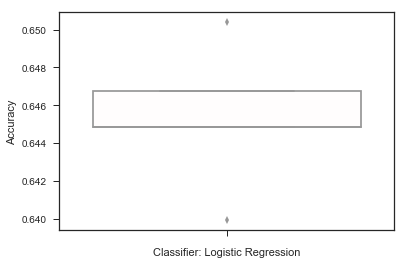

In [98]:
sns.set(style="ticks")
sns.boxplot(y = cv_accuracy,palette="seismic" )
plt.xlabel('Classifier: Logistic Regression')
plt.ylabel('Accuracy')
plt.show()

# Interpret feature importance

Our final selected logistic regression model is model 1. Let's look further into the output of model 1.

The features are loisted below with the absolute values of their weights. A visual representation follows.

In [107]:
weights = pd.Series(lr_model1.coef_[0], index = df_svm.columns)
weights.sort_values(axis=0, ascending=True, inplace=True)
lr_df = pd.DataFrame(weights).reset_index()
lr_df.columns=['var','weights']
lr_df.weights = lr_df.weights.astype(float)
lr_df.weights = lr_df.weights.abs()
lr_df = lr_df[(lr_df.weights > 0.001) | (lr_df.weights < -0.001)]
lr_df.sort_values(['weights'],ascending=False,inplace=True)
print(tabulate(lr_df,headers=['Variable','Weights'],tablefmt="grid")) 

+----+---------------------------------+------------+
|    | Variable                        |    Weights |
+====+=================================+============+
| 38 | ln_kw_avg_avg                   | 0.532607   |
+----+---------------------------------+------------+
| 37 | is_weekend                      | 0.24137    |
+----+---------------------------------+------------+
|  0 | kw_max_max                      | 0.202907   |
+----+---------------------------------+------------+
| 36 | data_channel_is_socmed          | 0.184162   |
+----+---------------------------------+------------+
|  1 | LDA_02                          | 0.175677   |
+----+---------------------------------+------------+
|  2 | data_channel_is_entertainment   | 0.169866   |
+----+---------------------------------+------------+
| 35 | LDA_04                          | 0.167765   |
+----+---------------------------------+------------+
|  3 | rate_positive_words             | 0.112313   |
+----+----------------------

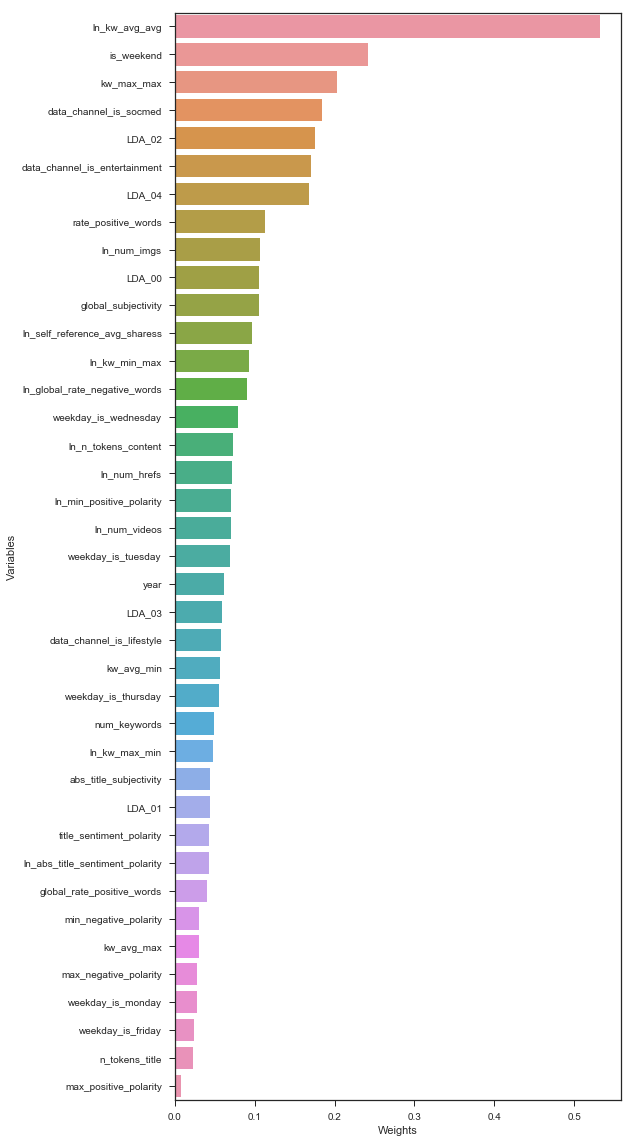

In [108]:
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 8, 20
sns.barplot(data=lr_df,y='var',x='weights')
plt.xlabel('Weights')
plt.ylabel('Variables')
plt.show()

The most important feature is the transformed average number of shares of the average keyword. This makes sense because a higher number of shares from keyword would imply a higher number of overall shares and therefore more popularity. The second most important feature for determining an article's popularity is if that article is published on a weekend. This high weighting also makes sense because a weekend typically has fewer people working and therefore it is reasonable to assume that weekends also have more people browsing social media, where shares take place. The next few important features are related to the type of article, specifically social media or entertainment, and again a keyword derived feature. All of these important features match very well with what intuition would suggest. The least influential attributes relate to characteristics like day of the week for weekdays, polarity, and the number of words in the title. Again, this weighting agrees with intuition.

### Interpret Support Vectors PATRICK!!! TO DO